In [19]:
import pandas as pd
import re
import sklearn.neighbors as nb
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder as LB
import sklearn.model_selection as cv
import sklearn
from sklearn import preprocessing
import random as rand
import numpy as np
import math

# Loading data 

In [3]:
data = pd.read_csv('games_clean.csv')
labels_num = ['Presence','Memory','ReleaseDate','OriginalCost','DiscountedCost','Achievements','Storage',
                'RatingsBreakdown-Recommended','RatingsBreakdown-Meh','RatingsBreakdown-Exceptional','RatingsBreakdown-Skip',
              'Metacritic']

In [4]:
data = data[labels_num]
data

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,RatingsBreakdown-Skip,Metacritic
0,333.0,512.0,2019.0,1.99,0.0,0.0,200.0,2.0,2.0,2.0,1.0,"(69.955, 73.684]"
1,363.0,1000.0,2016.0,2.99,0.0,0.0,350.0,1.0,1.0,2.0,1.0,"(65.464, 69.955]"
2,102.0,1024.0,2019.0,0.99,0.0,0.0,122.0,1.0,1.0,1.0,1.0,"(73.684, 94.0]"
3,269.0,4000.0,2019.0,0.00,0.0,0.0,300.0,2.0,2.0,1.0,1.0,"(69.955, 73.684]"
4,217.0,4000.0,2016.0,11.99,0.0,18.0,4000.0,1.0,1.0,1.0,1.0,"(69.955, 73.684]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,161.0,512.0,2014.0,1.99,0.0,0.0,150.0,1.0,1.0,1.0,2.0,"(19.999, 65.464]"
2196,411.0,4000.0,2020.0,11.99,0.0,0.0,700.0,1.0,1.0,1.0,1.0,"(69.955, 73.684]"
2197,249.0,4000.0,2016.0,3.99,0.0,20.0,100.0,1.0,3.0,1.0,4.0,"(73.684, 94.0]"
2198,191.0,1000.0,2019.0,14.99,0.0,0.0,800.0,2.0,1.0,1.0,2.0,"(69.955, 73.684]"


In [7]:
LE = LB()
class_names = data['Metacritic'].unique()
data.loc[:, 'Metacritic'] = LE.fit_transform(data['Metacritic'])

In [8]:
# Let's separate Data from labels

X = data.drop(['Metacritic'],axis=1)   # Data
y = data['Metacritic']

print(X.shape)
print(y.shape)

(2200, 11)
(2200,)


# Starting KNN

In [17]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.27424242424242423


In [20]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[69 35 29 36]
 [60 33 31 28]
 [66 39 39 28]
 [57 37 33 40]]


In [21]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.41      0.33       169
           1       0.23      0.22      0.22       152
           2       0.30      0.23      0.26       172
           3       0.30      0.24      0.27       167

    accuracy                           0.27       660
   macro avg       0.28      0.27      0.27       660
weighted avg       0.28      0.27      0.27       660



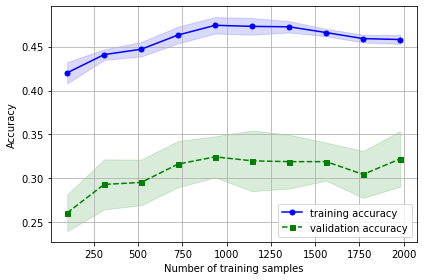

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=3),
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

Accuracy 1 neighbour: 0.2733766233766234
Accuracy 3 neighbours: 0.2811688311688311
Accuracy 5 neighbours: 0.3064935064935065
Accuracy 7 neighbours: 0.3038961038961039
Accuracy 9 neighbours: 0.3136363636363636


In [26]:
# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 1 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 3 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 5 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 9 neighbour and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour: and distance weighting: 0.2733766233766234
Accuracy 3 neighbour: and distance weighting: 0.2805194805194805
Accuracy 5 neighbour: and distance weighting: 0.28831168831168835
Accuracy 7 neighbour: and distance weighting: 0.2961038961038961
Accuracy 9 neighbour: and distance weighting: 0.29935064935064937


# Grid Search method

In [32]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 11, 'weights': 'uniform'} Accuracy= 0.32662337662337665


# Authomatically find best parameters

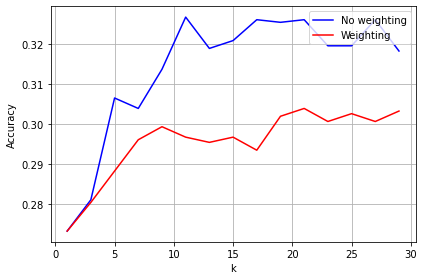

In [31]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()